# Лабораторная работа №4 Лисин РТ5-61Б

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('pokemon.csv', sep = ",")

In [3]:
data.head()

,Number,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80


In [4]:
data.shape

(1168, 10)

In [5]:
data.dtypes

Number             object
Name               object
Type               object
Total               int64
HP                  int64
Attack              int64
Defense             int64
Special Attack      int64
Special Defense     int64
Speed               int64
dtype: object

In [6]:
data.isnull().sum()

Number             0
Name               0
Type               0
Total              0
HP                 0
Attack             0
Defense            0
Special Attack     0
Special Defense    0
Speed              0
dtype: int64

Датасет практически идеален, нужно лишь кодировать признак Type и удалить Number и Name, так как нам не нужны эти колонки, а также total потому что это фактически сумма остальных параметров

In [7]:
data = data.drop('Name', 1)
data = data.drop('Number', 1)
data = data.drop('Total', 1)

In [8]:
data = pd.get_dummies(data)

In [9]:
data.head()

,HP,Attack,Defense,Special Attack,Special Defense,Speed,Type_BUG,Type_DARK,Type_DRAGON,Type_ELECTRIC,...,Type_GHOST,Type_GRASS,Type_GROUND,Type_ICE,Type_NORMAL,Type_POISON,Type_PSYCHIC,Type_ROCK,Type_STEEL,Type_WATER
0,45,49,49,65,65,45,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,45,49,49,65,65,45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60,62,63,80,80,60,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,60,62,63,80,80,60,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,80,82,83,100,100,80,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Перенесем целевой признак в конец

In [13]:
columns = data.columns.tolist()
column = columns.pop(columns.index("HP"))
columns.append(column)

data = data[columns]

## Разделим выборку

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
y_column = "HP"
x_columns = data.columns.tolist()
x_columns.pop(x_columns.index(y_column))

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data[x_columns], data[y_column], test_size = 0.8, random_state = 15)

## Линейная регрессия

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

In [20]:
Lin_Reg = LinearRegression().fit(data_x_train, data_y_train)

lr_y_pred = Lin_Reg.predict(data_x_test)

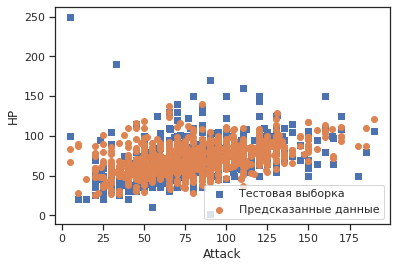

In [23]:
plt.scatter(data_x_test.Attack, data_y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(data_x_test.Attack, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Attack')
plt.ylabel ('HP')
plt.show()

In [28]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(data_y_test, lr_y_pred))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_y_test, lr_y_pred))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_y_test, lr_y_pred, squared = False))
print('Коэффициент детерминации:',   r2_score(data_y_test, lr_y_pred))

Средняя абсолютная ошибка: 16.057156200603277
Медианная абсолютная ошибка: 12.01150791881821
Среднеквадратичная ошибка: 22.32877016946768
Коэффициент детерминации: 0.18134064651141912


## SVM

In [33]:
from sklearn.svm import SVC , NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [34]:
SV = SVR()
SV.fit(data_x_train, data_y_train)
sv_y_pred = SV.predict(data_x_test)

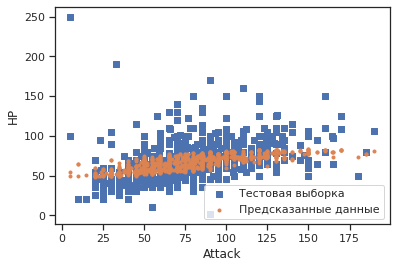

In [39]:
plt.scatter(data_x_test.Attack, data_y_test, marker = 's', label = 'Тестовая выборка')
plt.scatter(data_x_test.Attack, sv_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Attack')
plt.ylabel ('HP')
plt.show()

In [40]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(data_y_test, sv_y_pred))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_y_test, sv_y_pred))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_y_test, sv_y_pred, squared = False))
print('Коэффициент детерминации:',   r2_score(data_y_test, sv_y_pred))

Средняя абсолютная ошибка: 14.710372867460615
Медианная абсолютная ошибка: 11.330734057663747
Среднеквадратичная ошибка: 21.378947642334424
Коэффициент детерминации: 0.24950765214768134


## Дерево поиска

In [58]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

DTR_1 = DecisionTreeRegressor(max_depth=4)
DTR_2 = DecisionTreeRegressor(max_depth=15)
DTR_1.fit(data_x_train, data_y_train)
DTR_2.fit(data_x_train, data_y_train)

dtr_y_pred_1 = DTR_1.predict(data_x_test)
dtr_y_pred_2 = DTR_2.predict(data_x_test)

In [59]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(data_y_test, dtr_y_pred_1))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_y_test, dtr_y_pred_1))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_y_test, dtr_y_pred_1, squared = False))
print('Коэффициент детерминации:',   r2_score(data_y_test, dtr_y_pred_1))

Средняя абсолютная ошибка: 14.908922627994496
Медианная абсолютная ошибка: 10.476190476190474
Среднеквадратичная ошибка: 21.204614646527826
Коэффициент детерминации: 0.26169741350929565


In [60]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(data_y_test, dtr_y_pred_2))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_y_test, dtr_y_pred_2))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_y_test, dtr_y_pred_2, squared = False))
print('Коэффициент детерминации:',   r2_score(data_y_test, dtr_y_pred_2))

Средняя абсолютная ошибка: 18.050133689839573
Медианная абсолютная ошибка: 11.0
Среднеквадратичная ошибка: 30.399320713896063
Коэффициент детерминации: -0.517404541458865


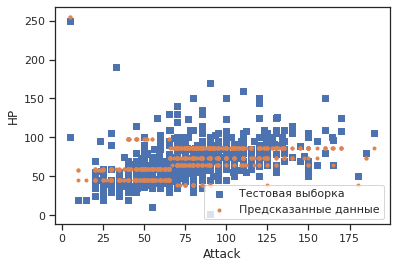

In [61]:
plt.scatter(data_x_test.Attack, data_y_test, marker = 's', label = 'Тестовая выборка')
plt.scatter(data_x_test.Attack, dtr_y_pred_1, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Attack')
plt.ylabel ('HP')
plt.show()

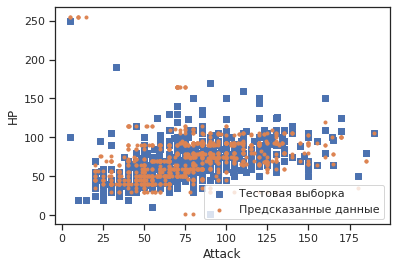

In [62]:
plt.scatter(data_x_test.Attack, data_y_test, marker = 's', label = 'Тестовая выборка')
plt.scatter(data_x_test.Attack, dtr_y_pred_2, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Attack')
plt.ylabel ('HP')
plt.show()

С точки зрения средней абсолютной и медианной абсолютной ошибки самой качественной моделью оказались опорные вектора, лучше них в этом справилось только глубокое дерево поиска, но судя по отрицательной детерминации оно переобучено.
С точки зрения детерминации лучше всего справилась линейная регрессия.